실습 1: 확률분포 시뮬레이션 및 시각화

1.1 기본 환경 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.special import kl_div
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 시드 설정
np.random.seed(42)

1.2 정규분포 시뮬레이션

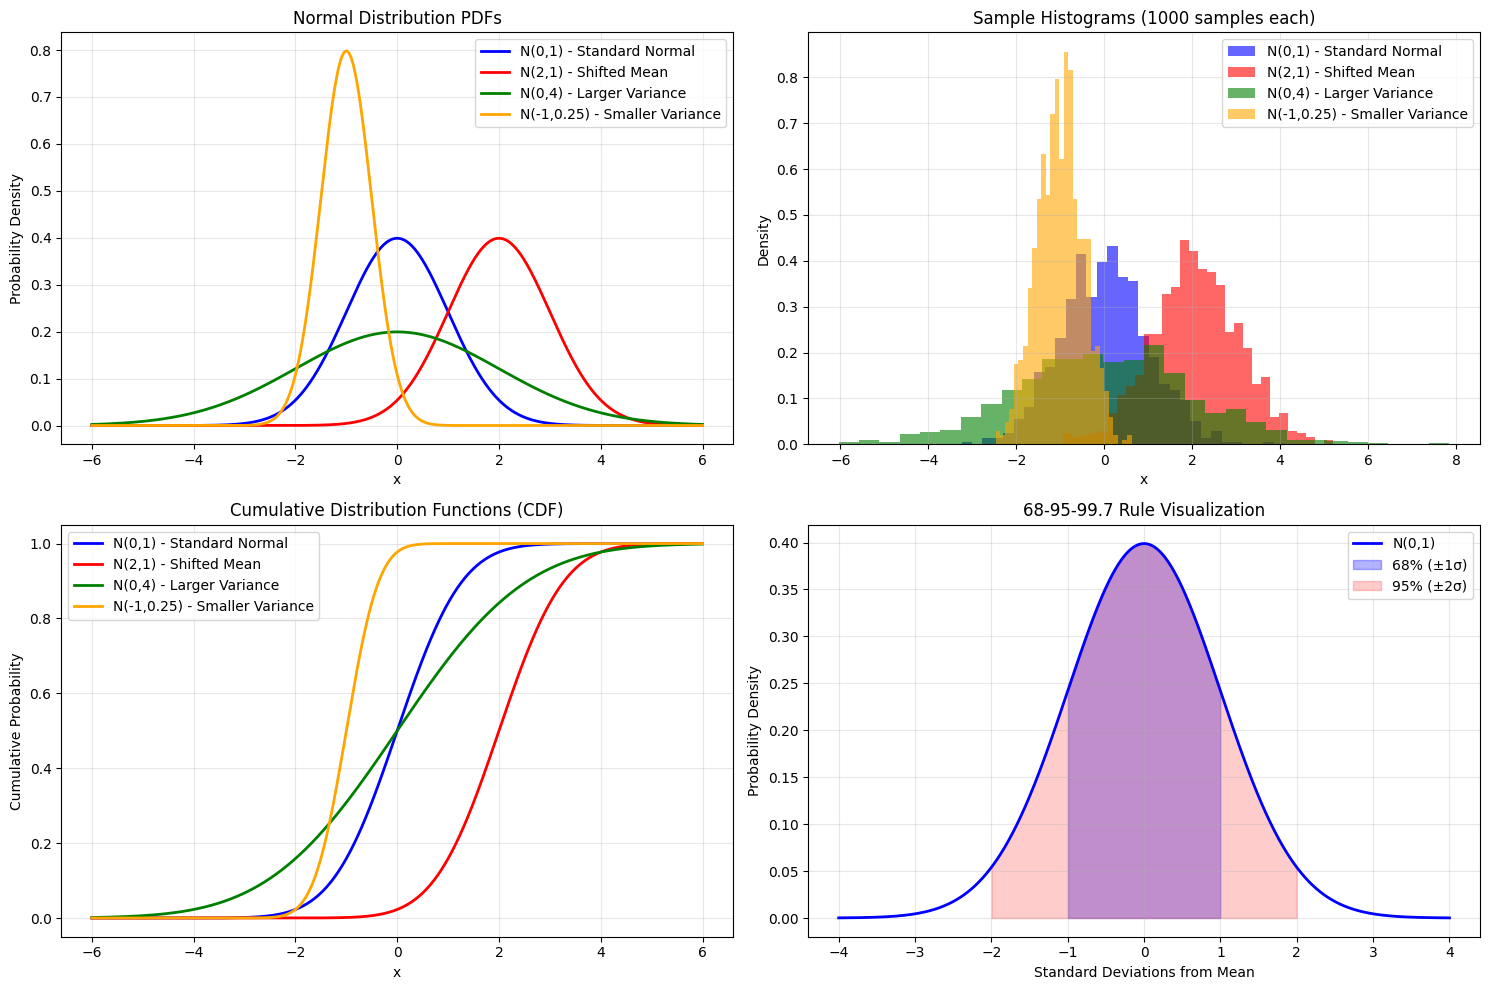

=== Normal Distribution Statistics ===
N(0,1) - Standard Normal:
  Theoretical: μ=0, σ=1
  Sample: μ=-0.008, σ=1.003
  68% range: [-1.0, 1.0]

N(2,1) - Shifted Mean:
  Theoretical: μ=2, σ=1
  Sample: μ=2.004, σ=0.999
  68% range: [1.0, 3.0]

N(0,4) - Larger Variance:
  Theoretical: μ=0, σ=2
  Sample: μ=-0.011, σ=2.009
  68% range: [-2.0, 2.0]

N(-1,0.25) - Smaller Variance:
  Theoretical: μ=-1, σ=0.5
  Sample: μ=-1.000, σ=0.499
  68% range: [-1.5, -0.5]



In [2]:
def simulate_normal_distributions():
    """다양한 정규분포를 생성하고 시각화"""
    
    # 파라미터 설정
    distributions = [
        {'mu': 0, 'sigma': 1, 'label': 'N(0,1) - Standard Normal', 'color': 'blue'},
        {'mu': 2, 'sigma': 1, 'label': 'N(2,1) - Shifted Mean', 'color': 'red'},
        {'mu': 0, 'sigma': 2, 'label': 'N(0,4) - Larger Variance', 'color': 'green'},
        {'mu': -1, 'sigma': 0.5, 'label': 'N(-1,0.25) - Smaller Variance', 'color': 'orange'}
    ]
    
    # x 범위 설정
    x = np.linspace(-6, 6, 1000)
    
    plt.figure(figsize=(15, 10))
    
    # 1. PDF 그래프
    plt.subplot(2, 2, 1)
    for dist in distributions:
        y = stats.norm.pdf(x, dist['mu'], dist['sigma'])
        plt.plot(x, y, label=dist['label'], color=dist['color'], linewidth=2)
    
    plt.title('Normal Distribution PDFs')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. 샘플 히스토그램
    plt.subplot(2, 2, 2)
    for i, dist in enumerate(distributions):
        samples = np.random.normal(dist['mu'], dist['sigma'], 1000)
        plt.hist(samples, bins=30, alpha=0.6, label=dist['label'], 
                color=dist['color'], density=True)
    
    plt.title('Sample Histograms (1000 samples each)')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. CDF 그래프
    plt.subplot(2, 2, 3)
    for dist in distributions:
        y = stats.norm.cdf(x, dist['mu'], dist['sigma'])
        plt.plot(x, y, label=dist['label'], color=dist['color'], linewidth=2)
    
    plt.title('Cumulative Distribution Functions (CDF)')
    plt.xlabel('x')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. 68-95-99.7 규칙 시각화
    plt.subplot(2, 2, 4)
    mu, sigma = 0, 1
    x_rule = np.linspace(-4, 4, 1000)
    y_rule = stats.norm.pdf(x_rule, mu, sigma)
    
    plt.plot(x_rule, y_rule, 'b-', linewidth=2, label='N(0,1)')
    
    # 68% 영역 (±1σ)
    x_68 = x_rule[(x_rule >= -1) & (x_rule <= 1)]
    y_68 = stats.norm.pdf(x_68, mu, sigma)
    plt.fill_between(x_68, y_68, alpha=0.3, color='blue', label='68% (±1σ)')
    
    # 95% 영역 (±2σ)
    x_95 = x_rule[(x_rule >= -2) & (x_rule <= 2)]
    y_95 = stats.norm.pdf(x_95, mu, sigma)
    plt.fill_between(x_95, y_95, alpha=0.2, color='red', label='95% (±2σ)')
    
    plt.title('68-95-99.7 Rule Visualization')
    plt.xlabel('Standard Deviations from Mean')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 통계량 계산 및 출력
    print("=== Normal Distribution Statistics ===")
    for dist in distributions:
        samples = np.random.normal(dist['mu'], dist['sigma'], 10000)
        print(f"{dist['label']}:")
        print(f"  Theoretical: μ={dist['mu']}, σ={dist['sigma']}")
        print(f"  Sample: μ={samples.mean():.3f}, σ={samples.std():.3f}")
        print(f"  68% range: [{dist['mu']-dist['sigma']:.1f}, {dist['mu']+dist['sigma']:.1f}]")
        print()

# 실행
simulate_normal_distributions()

1.3 베르누이 및 이항분포 시뮬레이션

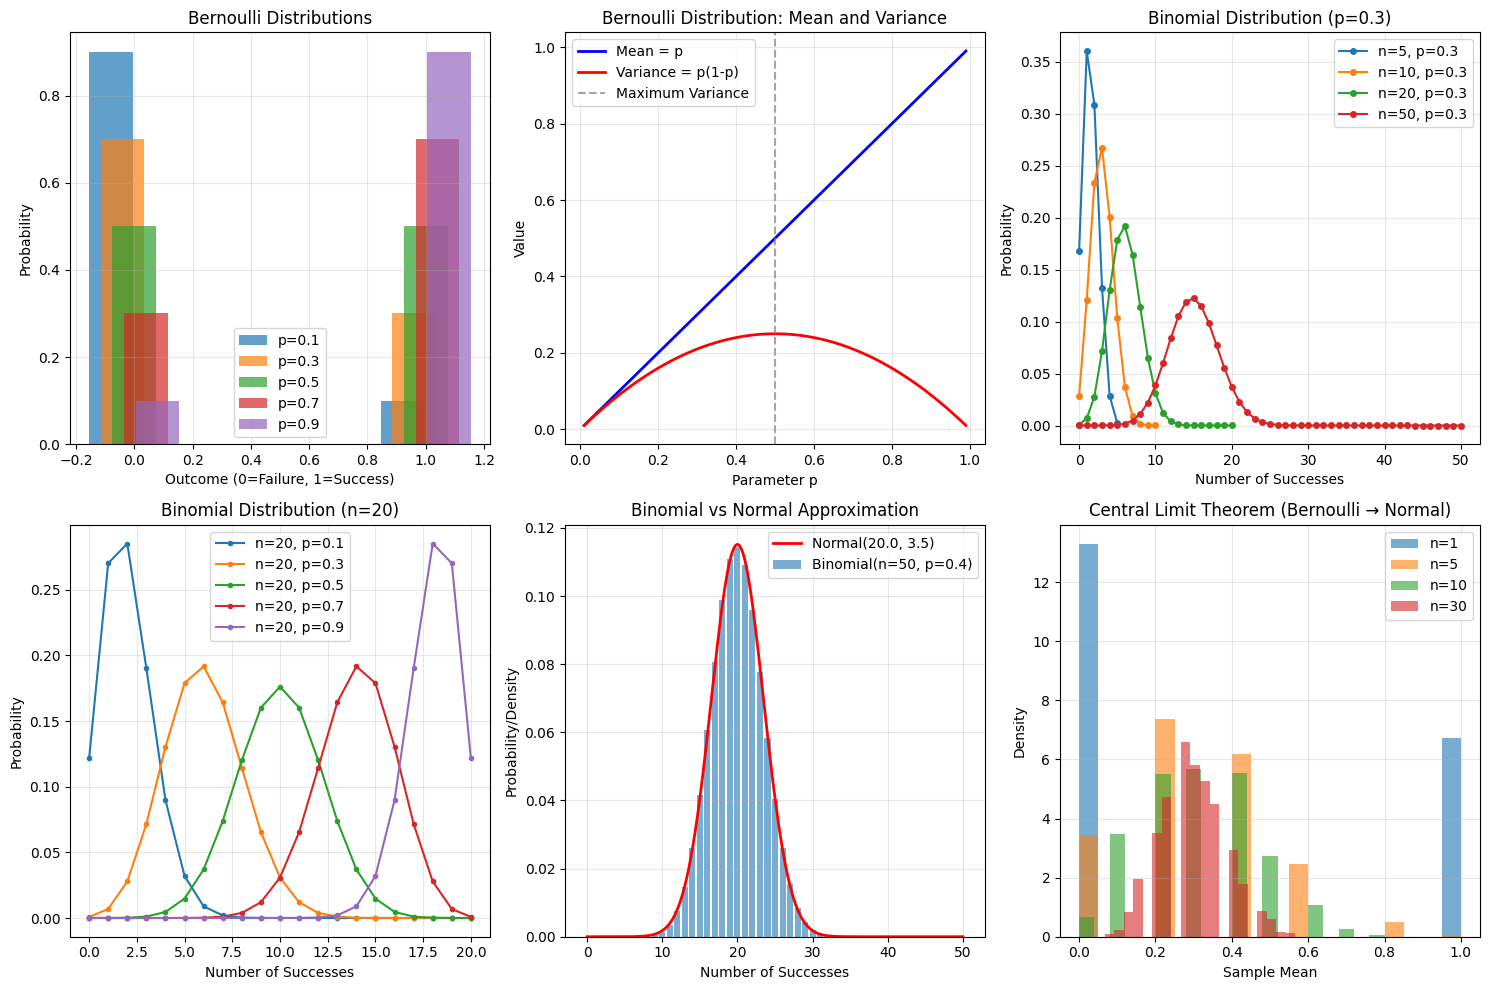

In [3]:
def simulate_bernoulli_binomial():
    """베르누이와 이항분포 시뮬레이션"""
    
    plt.figure(figsize=(15, 10))
    
    # 1. 베르누이 분포들
    plt.subplot(2, 3, 1)
    p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
    x_bern = [0, 1]
    
    for p in p_values:
        y_bern = [1-p, p]
        plt.bar([x-0.1 + p*0.2 for x in x_bern], y_bern, width=0.15, 
                alpha=0.7, label=f'p={p}')
    
    plt.title('Bernoulli Distributions')
    plt.xlabel('Outcome (0=Failure, 1=Success)')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. 베르누이 분포의 평균과 분산
    plt.subplot(2, 3, 2)
    p_range = np.linspace(0.01, 0.99, 100)
    means = p_range
    variances = p_range * (1 - p_range)
    
    plt.plot(p_range, means, 'b-', linewidth=2, label='Mean = p')
    plt.plot(p_range, variances, 'r-', linewidth=2, label='Variance = p(1-p)')
    plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.7, label='Maximum Variance')
    
    plt.title('Bernoulli Distribution: Mean and Variance')
    plt.xlabel('Parameter p')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. 이항분포 (다양한 n, 고정 p=0.3)
    plt.subplot(2, 3, 3)
    p = 0.3
    n_values = [5, 10, 20, 50]
    
    for n in n_values:
        x = np.arange(0, n+1)
        y = stats.binom.pmf(x, n, p)
        plt.plot(x, y, 'o-', label=f'n={n}, p={p}', markersize=4)
    
    plt.title(f'Binomial Distribution (p={p})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. 이항분포 (고정 n=20, 다양한 p)
    plt.subplot(2, 3, 4)
    n = 20
    p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
    
    x = np.arange(0, n+1)
    for p in p_values:
        y = stats.binom.pmf(x, n, p)
        plt.plot(x, y, 'o-', label=f'n={n}, p={p}', markersize=3)
    
    plt.title(f'Binomial Distribution (n={n})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. 이항분포의 정규분포 근사
    plt.subplot(2, 3, 5)
    n, p = 50, 0.4
    x_bin = np.arange(0, n+1)
    y_bin = stats.binom.pmf(x_bin, n, p)
    
    # 정규분포 근사
    mu = n * p
    sigma = np.sqrt(n * p * (1-p))
    x_norm = np.linspace(0, n, 1000)
    y_norm = stats.norm.pdf(x_norm, mu, sigma)
    
    plt.bar(x_bin, y_bin, alpha=0.6, label=f'Binomial(n={n}, p={p})')
    plt.plot(x_norm, y_norm, 'r-', linewidth=2, 
             label=f'Normal({mu:.1f}, {sigma:.1f})')
    
    plt.title('Binomial vs Normal Approximation')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability/Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 6. 중심극한정리 시연
    plt.subplot(2, 3, 6)
    p = 0.3
    sample_sizes = [1, 5, 10, 30]
    n_experiments = 1000
    
    for n in sample_sizes:
        # n번의 베르누이 시행을 1000번 반복
        sample_means = []
        for _ in range(n_experiments):
            samples = np.random.binomial(1, p, n)
            sample_means.append(samples.mean())
        
        plt.hist(sample_means, bins=20, alpha=0.6, density=True, 
                label=f'n={n}')
    
    plt.title('Central Limit Theorem (Bernoulli → Normal)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 실행
simulate_bernoulli_binomial()